## Business Understanding 

### Prediksi harga properti di Bandung menggunakan Machine Learning

prediksi harga properti berdasarkan jumlah kamar, luas tanah, luas bangunan

In [ ]:
!python --version

Python 3.8.10


#### Import library

In [ ]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Read Data

In [ ]:
# # membaca data excel
# read_file = pd.read_excel ("properti.xlsx")
  
# # simpan objek datafram ke csv file 
# read_file.to_csv ("properti.csv", 
#                   index = None,
#                   header=True)

In [ ]:
# membaca file hasil konversi
# menjadi dataframe objek
df = pd.DataFrame(pd.read_csv("/properti.csv"))
  
# tampilkan dataframe
df

,judul,alamat,deskripsi,kamar,bangunan,lahan,harga
0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000
1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000
2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000
3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000
4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000
...,...,...,...,...,...,...,...
1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000
1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000
1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000
1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000


### Data Understanding
- Data diatasa merupakan data harga properti di Bandung
- **Objective goals** kita yaitu **memprediksi harga**. 
- Harga merupakan data type numeric, maka kita coba metode sederhana yaitu **Regresi Linear Berganda**
- Kenapa pakai Berganda? Karena terdapat lebih dari 1 independent variabel (x) dalam memprediksi nilai dependent (y)
- Rumus Regresi Linear Berganda yaitu sebagai berikut:
<br>**Y = b + m1*x1 + m2*x2 + … + mn*xn**
<br>
Kererangan:
<br> 
Y = dependent variable / variabel tidak bebas
<br>
mn = koefisien regresi = rata2 perubahan y jika x bertambah 1 unit
<br>
xn = independent variable / variable bebas
<br>
b = intercept = Nilai y pada x = 0

In [ ]:
# Mengetahui jumlah kolom dan baris dari data
df.shape

(1470, 7)

```
- Terdapat 1470 data observation, 7 features
- Tujuan awal kita memprediksi harga berdasarkan jumlah kamar, luas bangunan, dan luas *tanah*
- Maka hapus features yang tidak kita gunakan, yaitu [judul, alamat, deskripsi]
```

In [ ]:
# hapus kolom judul, alamat, deskripsi
df.drop(columns=["judul", "alamat", "deskripsi"] , inplace=True)
df

,kamar,bangunan,lahan,harga
0,3,75,84,590000000
1,3,70,71,700000000
2,2,36,72,386000000
3,2,60,60,499000000
4,2,90,114,397500000
...,...,...,...,...
1465,6,280,240,2800000000
1466,3,180,90,1000000000
1467,2,65,72,572000000
1468,6,160,318,2300000000


In [ ]:
# Selanjutnya kita lihat tipe data, memory yang digunakan dan jumlah null data
# tidak ada null values dan type sudah sesui int, alias sudah clean
df.info()
print("\n cek nul values")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kamar     1470 non-null   int64
 1   bangunan  1470 non-null   int64
 2   lahan     1470 non-null   int64
 3   harga     1470 non-null   int64
dtypes: int64(4)
memory usage: 46.1 KB

 cek nul values


kamar       0
bangunan    0
lahan       0
harga       0
dtype: int64

In [ ]:
# Statistical description
df.describe()

,kamar,bangunan,lahan,harga
count,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,3.646259,177.489116,210.235374,2.581586e+09
std,2.535528,176.726326,500.109095,4.358051e+09
min,0.000000,0.000000,0.000000,6.500000e+07
25%,2.000000,65.000000,80.000000,6.750000e+08
50%,3.000000,122.500000,120.000000,1.370000e+09
75%,4.000000,230.000000,210.000000,3.000000e+09
max,47.000000,1850.000000,15000.000000,5.700000e+10


### Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

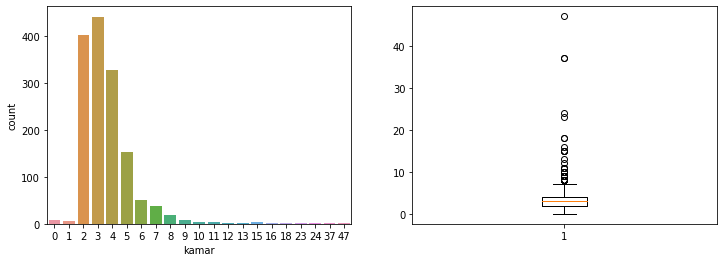

In [ ]:
# Univariate analysis feature kamar
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['kamar'])

f.add_subplot(1,2,2)
plt.boxplot(df['kamar'])
plt.show

```
- Dapat dilihat sebagian besar jumlah kamar tidur ada di angka 2, 3, dan 4
- Data memiliki banyak outliers
```

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

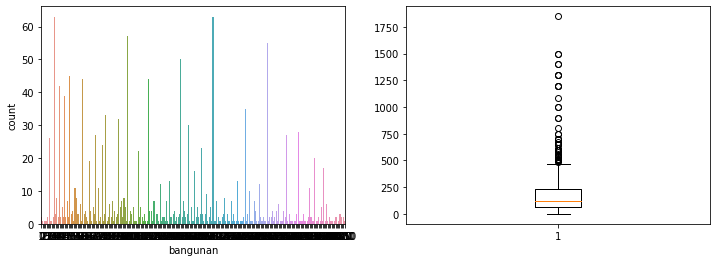

In [ ]:
# univariate analysis luas bangunan
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bangunan'])

f.add_subplot(1,2,2)
plt.boxplot(df['bangunan'])
plt.show

```
* Jika dilihat pakai diagram batang diatas,  nampak tidak jelas karena memiliki n values di sumbu x 
yang cukup banyak
* Solusi nya pakai data viz lain yaitu histogram
* Ada data outliers
```

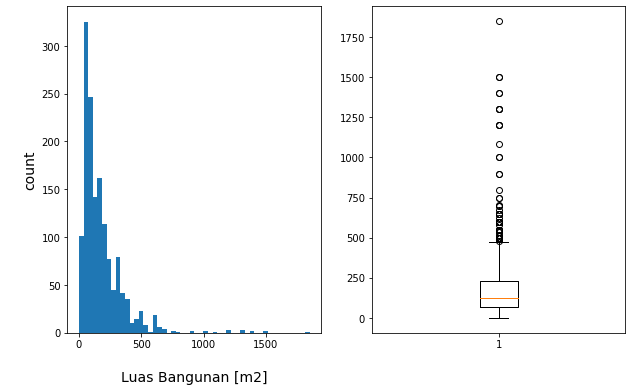

In [ ]:
  # Histogram Luas Tanah
  f = plt.figure(figsize=(12,4))

  f.add_subplot(1,2,1)
  df['bangunan'].plot(kind='hist', figsize=(10, 6), bins=50)
  # plt.title('Luas Tanah\n', size=16)
  plt.ylabel('\ncount', size=14)
  plt.xlabel('\nLuas Bangunan [m2]', size=14)

  f.add_subplot(1,2,2)
  plt.boxplot(df['bangunan'])
  plt.show()

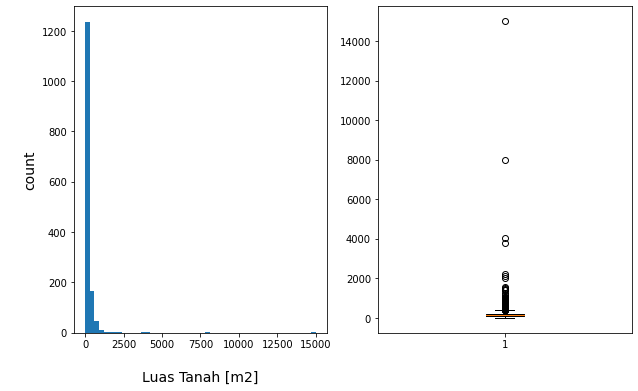

In [ ]:
# Histogram Luas Tanah / lahan
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['lahan'].plot(kind='hist', figsize=(10, 6), bins=50)

plt.ylabel('\ncount', size=14)
plt.xlabel('\nLuas Tanah [m2]', size=14)

f.add_subplot(1,2,2)
plt.boxplot(df['lahan'])
plt.show()

```
- Data banyak memiliki outliers
```

In [ ]:
df["kamar"].unique()

array([ 3,  2,  7,  4, 13,  6,  5,  9,  8, 23,  1, 12, 15, 11, 10, 18,  0,
       24, 37, 16, 47])

In [ ]:
df["lahan"].unique()

array([   84,    71,    72,    60,   114,    80,   620,   276,   100,
         120,    35,    70,    50,    78,    69,   125,   110,   421,
          40,    65,    47,   342,    55,   260,   160,   254,    81,
          90,    92,    59,   150,    62,    36,   381,    37,    63,
         167,   148,   193,    66,   118,   126,    56,    41,   177,
         344,   278,     0,   215,   179,   264,   500,    83,   155,
          91,   320,   290,   300,   127,   128,   189,   102,   105,
         385,   112,   158,    96,    54,   130,   830,    34,   154,
         226,    88,    97,   450,    98,    45,   360,   190,   144,
          75,   380,   642,   255,  1170,    43,    57,   119,    95,
         140,    89,   267,    61,   108,   200,   210,   319,   223,
         233,   240,   212,   414,   411,    30,   161,   288,   152,
         136,   375,   861,   543,   180,   420,   204,   350,   170,
         477,   172,   588,    67,   207,   117,   387,   230,   262,
         187,   197,

In [ ]:
df["bangunan"].unique()

array([  75,   70,   36,   60,   90,   48,  200,  350,   30,  670,  100,
         65,   37,   21,   80,   45,   49,   40,   50,  140,  150,  450,
        170,   55,   73,   61,  315,  120,  110,   83,  250,   56,   38,
         77,   58,   68,  240,   98,  324,  101,  300,   86,  230,  320,
         34,  212,   43,  650,  135,   94,   54,   72,  260,  196,  180,
        123, 1085,   42,  124,   27,  400,  800,  115,  149,  241,   52,
         29,  126,  128,  160, 1500,   35,  125,   88,   74,   62,  235,
         78,  130,  147,  185,  470,  210,  411,  122,  340,  155,   39,
        600,  227,  276,  280,  141,  144,  348,   96,  175,  220,   85,
        129,  440,  190,  255,  237,  270,  127,  380,  376,  106,  159,
         69,  550,  167,  422,   53,  330,  156,  142,  177,  133,   87,
        290,  500,  214,  215,  269,  516,  213,  102,  114,  116,  171,
        317,  197,   81,  750,  323,   51,  145,  248,  325,  154,  420,
         89,  294,  216,  132,   47,  192,  136,  2

In [ ]:
# Buang data yang ga masuk akal, atau sesuai kebutuhan kita
mask_kamar = df["kamar"] < 5
mask_LT = df["lahan"] < 1000
mask_LB = df["bangunan"] < 1000

# Buat subset baru
df = df[mask_kamar & mask_LT & mask_LB]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kamar     1173 non-null   int64
 1   bangunan  1173 non-null   int64
 2   lahan     1173 non-null   int64
 3   harga     1173 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


### Buat visalisasi pie chart untuk membuat perbedaan type properti

([<matplotlib.patches.Wedge at 0x7fedf27bb550>,
 [Text(0.49557961414786905, 0.98203912653267, 'Keluarga Kecil'),
  Text(-1.0695897293404308, -0.2568614624451552, 'Keluarga Menengah'),
  Text(0.711195337802362, -0.8391669628197861, 'Kelaurga Besar')],
 [Text(0.2703161531715649, 0.5356577053814563, '35%'),
  Text(-0.583412579640235, -0.1401062522428119, '37%'),
  Text(0.3879247297103792, -0.4577274342653378, '28%')])

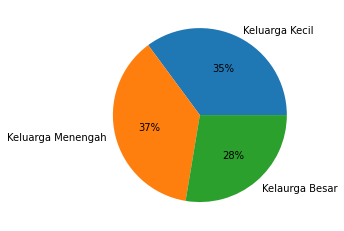

In [ ]:
# Buat kategorisasi dari data jumlah kamarnya
min_price = df['kamar'].min()
max_price = df['kamar'].max()
q = df['kamar'].quantile([.25, .5, .75])
q

kmr_kcl = df.loc[df['kamar'] <= q[0.25]]
kmr_mng = df.loc[(df['kamar'] > q[0.25]) & (df['kamar'] <= q[0.50])]
kmr_bsr = df.loc[df['kamar'] > q[0.50]]

plt.pie([len(kmr_kcl), 
         len(kmr_mng), 
         len(kmr_bsr)], 
        labels = ['Keluarga Kecil', 'Keluarga Menengah', 'Kelaurga Besar'], 
        autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7fedf27880a0>,
 [Text(0.7762535138198378, 0.7793782664934629, 'Cluster Minimalis'),
  Text(-0.7927730346372328, 0.7625686300603199, ' Cluster Premium'),
  Text(0.019148578927327905, -1.099833320064938, 'Cluster Exclusive')],
 [Text(0.4234110075380933, 0.4251154180873433, '25%'),
  Text(-0.43242165525667237, 0.4159465254874472, '25%'),
  Text(0.010444679414906129, -0.5999090836717842, '49%')])

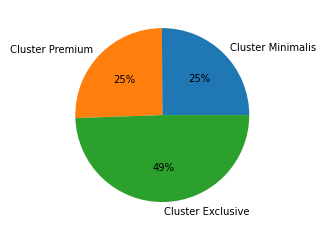

In [ ]:
# Buat kategorisasi dari data harga min, max, dan quantile, kemudian buat labeling dengan nama Cluster Minimalis, Cluster Premium, Cluster Exclusive
min_price = df['harga'].min()
max_price = df['harga'].max()
q = df['harga'].quantile([.25, .5, .75])
q

low_price_house = df.loc[df["harga"] <= q[0.25]]
mid_price_house = df.loc[(df["harga"] > q[0.25]) & (df["harga"] <= q[0.50])]
high_price_house = df.loc[df["harga"] > q[0.50]]

plt.pie([len(low_price_house), 
         len(mid_price_house), 
         len(high_price_house)], 
        labels = ['Cluster Minimalis', ' Cluster Premium', 'Cluster Exclusive'],
        autopct='%.0f%%')

In [ ]:
# Mengetahui nilai korelasi independent dan dependent variable
df.corr().style.background_gradient().set_precision(2)

<ipython-input-18-a8f37df305d0>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,kamar,bangunan,lahan,harga
kamar,1.00,0.54,0.41,0.25
bangunan,0.54,1.00,0.75,0.64
lahan,0.41,0.75,1.00,0.76
harga,0.25,0.64,0.76,1.00


```
Urutan feature yang mempengaruhi harga properti di bandung
*  Lahan
*  Bangunan
*  Kamar
```

### Setelah mengetahui karakteristik data, kita lanjut modeling

In [ ]:
# Pertama, buat variabel x dan y
x = df.drop(columns='harga')# kamar, lb, lt, 
y = df['harga'] # harga

# 1140--> 80%  --> 912 data training
# 228 --> 20%--> data testing
# Kedua, split data training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Ketiga, buat model regresi linear
lin_reg = LinearRegression()

# Keempat, train model menggunakan data training yang sudah di split
lin_reg.fit(x_train, y_train)

# Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print("coef:", lin_reg.coef_)
print("intercept:", lin_reg.intercept_)

coef: [-4.33428397e+08  8.25901653e+06  1.51779774e+07]
intercept: -156213073.61739874


In [ ]:

df = df.groupby("harga")
df.first()

,kamar,bangunan,lahan
harga,,,
65000000,2,21,35
100000000,2,30,40
115000000,2,36,60
130000000,2,30,50
135000000,2,36,48
...,...,...,...
22000000000,4,177,679
34000000000,0,500,850
38000000000,4,600,800


In [ ]:
coef_dict = {
    'features': x.columns,
    'coef_value' : lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,kamar,-4.334284e+08
1,bangunan,8.259017e+06
2,lahan,1.517798e+07


```
Y = -4.3x1 + 14477300.94x2 + 11010915.01x3
```

In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.7317353135318809

In [ ]:
# Hands On Prediction dengan custom parameter features 
# 1. kamar = 2
# 2. Luas bangunan = 120
# 3. Luas Tanah = 150
predict = lin_reg.predict([[2,120,150]])
predict = round(float(predict),2)

prediksi = "{:,}".format(predict)
print("Rp", prediksi)

Rp 2,244,708,725.41


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
